In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [37]:
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [38]:
!pwd


/home/nwoofter/sipm-analysis


In [39]:
data_dir = '/scratch/gpfs/nwoofter/results/2023-06-07/*/'
glob.glob(data_dir)

[]

# Load pre-processed h5 files
These files should be processed by `exe/laser_pulse.py` script.

In [46]:
# data folder
path = "/scratch/gpfs/nwoofter/results/2023-06-07/"
data = {}
intensity = [1020]
channels = [0, 1, 2]
volt = 90
for intn in intensity:
    data[intn] = {}
    for ch in channels:
        data[intn][ch] = {'n_spe_wfs':0, 'avg_spe_wf':np.zeros(0), 'time':np.zeros(0)}
        files = glob.glob(f"{path}/*intensity_{intn}*_wf.h5")
        print(files)
        for f in files:
            df = pd.read_hdf(f, key=f'{volt}/{ch}')
            print(df)
            data[intn][ch]['n_spe_wfs'] += np.array(df['n_spe_wfs'])[0]
            if data[intn][ch]['time'].shape[0]==0:
                data[intn][ch]['time'] = np.array(df['time'])
            if data[intn][ch]['avg_spe_wf'].shape[0]==0:
                data[intn][ch]['avg_spe_wf'] = np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
            else:
                data[intn][ch]['avg_spe_wf'] += np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
            df = None
            data[intn][ch]['avg_spe_wf'] /= data[intn][ch]['n_spe_wfs']
print('keys: ', list(data[1020][0].keys()))

['/scratch/gpfs/nwoofter/results/2023-06-07/2023-06-07_volt_90_light_laser_cond_ln_intensity_1020_config_1_intensity_1020_run0_wf.h5']
      n_spe_wfs  avg_spe_wf    time
0       14630.0   -0.495014   0.000
1           NaN    0.516879   0.004
2           NaN   -0.507728   0.008
3           NaN    0.540461   0.012
4           NaN   -0.493920   0.016
...         ...         ...     ...
3995        NaN    0.578534  15.980
3996        NaN   -0.529874  15.984
3997        NaN    0.502457  15.988
3998        NaN   -0.492417  15.992
3999        NaN    0.563223  15.996

[4000 rows x 3 columns]
['/scratch/gpfs/nwoofter/results/2023-06-07/2023-06-07_volt_90_light_laser_cond_ln_intensity_1020_config_1_intensity_1020_run0_wf.h5']
      n_spe_wfs  avg_spe_wf    time
0       16751.0   -0.442159   0.000
1           NaN    0.337197   0.004
2           NaN   -0.567943   0.008
3           NaN    0.435759   0.012
4           NaN   -0.397027   0.016
...         ...         ...     ...
3995        NaN    0.

In [41]:
intn = 1020
ch = 0
volt = 90
data[intn][ch]

{'n_spe_wfs': 14630.0,
 'avg_spe_wf': array([-0.49501398,  0.51687939, -0.50772759, ...,  0.50245697,
        -0.49241658,  0.56322252]),
 'time': array([0.0000e+00, 4.0000e-03, 8.0000e-03, ..., 1.5988e+01, 1.5992e+01,
        1.5996e+01])}

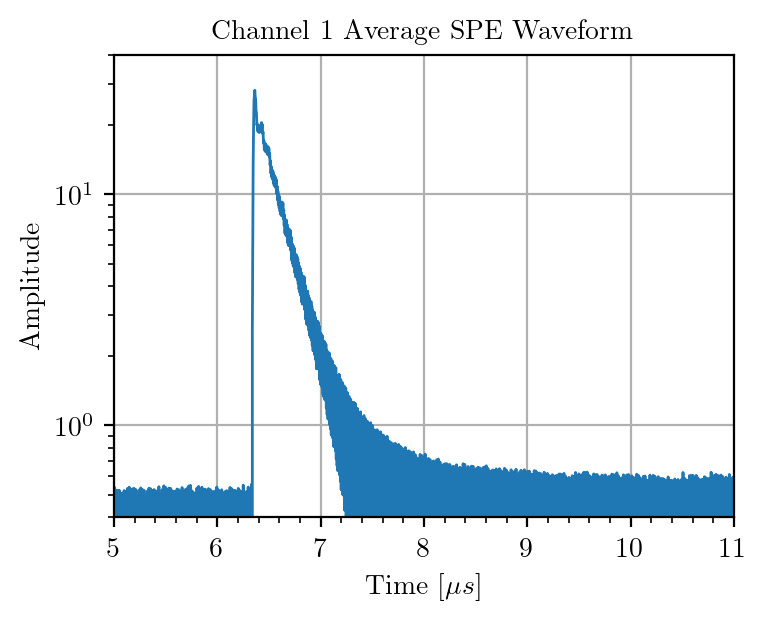

In [48]:
intn = 1020
ch = 0

plt.plot(data[intn][ch]['time'], data[intn][ch]['avg_spe_wf'], linewidth = '1')
plt.minorticks_on()
plt.title('Channel 1 Average SPE Waveform')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Amplitude')
plt.yscale('log')
plt.xlim(5, 11)
plt.ylim(0.4, 40)
plt.grid()

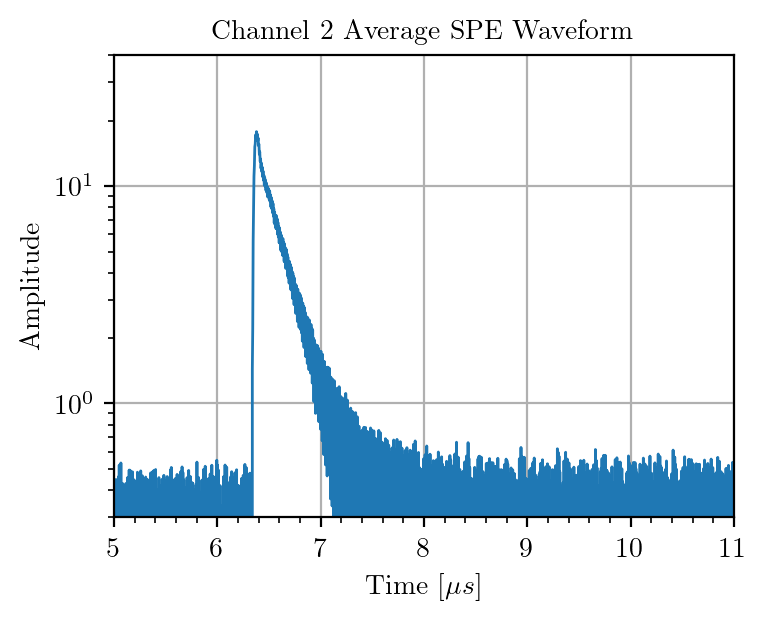

In [43]:
intn = 1020
ch = 1

plt.plot(data[intn][ch]['time'], data[intn][ch]['avg_spe_wf'], linewidth = '1')
plt.minorticks_on()
plt.title('Channel 2 Average SPE Waveform')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Amplitude')
plt.yscale('log')
plt.xlim(5, 11)
plt.ylim(0.3, 40)
plt.grid()

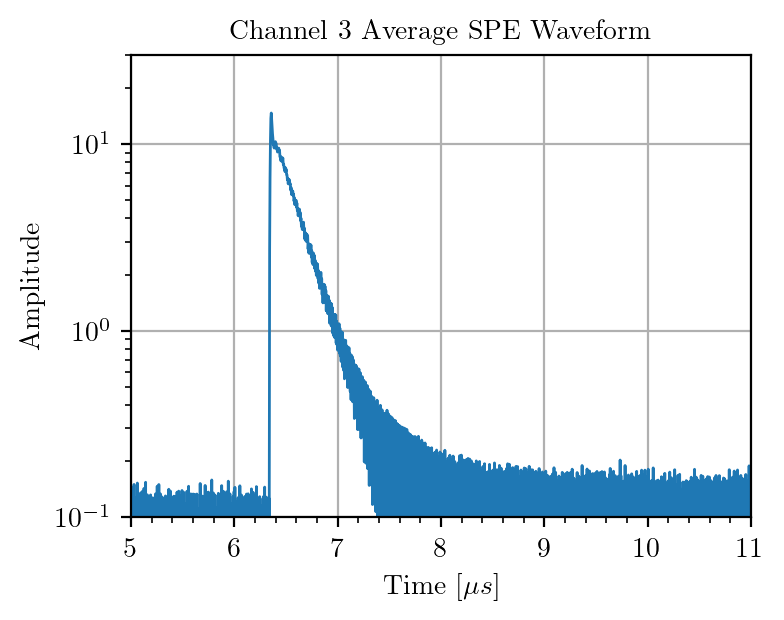

In [51]:
intn = 1020
ch = 2

plt.plot(data[intn][ch]['time'], data[intn][ch]['avg_spe_wf'], linewidth = '1')
plt.minorticks_on()
plt.title('Channel 3 Average SPE Waveform')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Amplitude')
plt.yscale('log')
plt.xlim(5, 11)
plt.ylim(0.1, 30)
plt.grid()

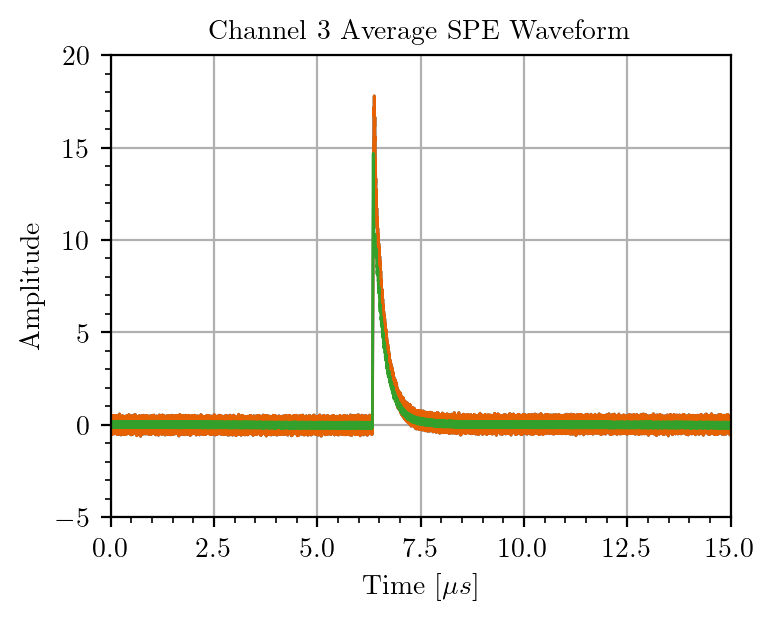

In [45]:
intn = 1020
ch = 1

plt.plot(data[intn][ch]['time'], data[intn][ch]['avg_spe_wf'], linewidth = '1')
plt.plot(data[intn][1]['time'], data[intn][1]['avg_spe_wf'], linewidth = '1')
plt.plot(data[intn][2]['time'], data[intn][2]['avg_spe_wf'], linewidth = '1')
plt.minorticks_on()
plt.title('Channel 3 Average SPE Waveform')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Amplitude')
plt.xlim(0, 15)
plt.grid()